In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


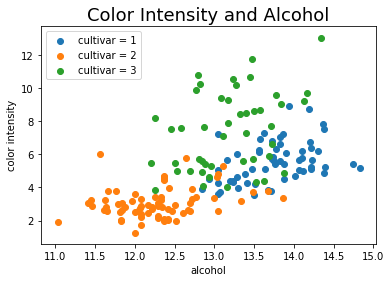

In [5]:
for tpw in range(1,4):
    gp = df[df.cultivar == tpw]
    plt.scatter(gp.alco, gp.color_int, label='cultivar = {}'.format(tpw))

plt.legend()
plt.xlabel('alcohol')
plt.ylabel("color intensity")
plt.title("Color Intensity and Alcohol", fontsize=18)
plt.show()

In [8]:
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [9]:
X = df[['alco','malic','tot_phen','color_int']]
y = df['cultivar']
LR = LogisticRegression()
param_dist1 = {'penalty': ['l1', 'l2'], 
               'C': sp_uniform(0.1, 10.0)}
RS1 = RandomizedSearchCV(LR, param_distributions=param_dist1, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
RS1.fit(X,y)

print('optimal tuning parameter values:', RS1.best_params_)
print('MSE of optimal results:', abs(RS1.best_score_))

optimal tuning parameter values: {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of optimal results: 0.11931818181818182


In [10]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [11]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
RF = RandomForestClassifier(bootstrap=True,oob_score=True)

RS2 = RandomizedSearchCV(RF, param_distributions=param_dist2,
                         n_iter=200, n_jobs=-1, cv=5, random_state=25,
                         scoring='neg_mean_squared_error')

RS2.fit(X, y)

print('optimal tuning parameter values:', RS2.best_params_)
print('MSE of optimal results:', abs(RS2.best_score_))


optimal tuning parameter values: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 12}
MSE of optimal results: 0.13068181818181818


In [12]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

In [13]:
svc = SVC(kernel='rbf')
param_dist3 = { 'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}

RS3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                         n_iter=200,n_jobs=-1, cv=5,random_state=25,
                         scoring='neg_mean_squared_error')
RS3.fit(X, y)
print('optimal tuning parameter values:', RS3.best_params_)
print('MSE of optimal results:', abs(RS3.best_score_))

optimal tuning parameter values: {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
MSE of optimal results: 0.13636363636363635


In [14]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
mlp = MLPClassifier(random_state=25)
RS4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                         n_iter=200, n_jobs=-1, cv=5,
                         random_state=25, scoring='neg_mean_squared_error')

RS4.fit(X, y)
print('optimal tuning parameter values:', RS4.best_params_)
print('MSE of optimal results:', abs(RS4.best_score_))